In [1]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

## Evaluating a Logistic Regression Model

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Load the data
obesity = pd.read_csv("obesity.csv")

# Inspect the data
print(obesity.head())

   Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0                               1     0   2.0  3.0     1      0   
1       0  21.0                               1     0   3.0  3.0     1      1   
2       1  23.0                               1     0   2.0  3.0     1      0   
3       1  27.0                               0     0   3.0  3.0     1      0   
4       1  22.0                               0     0   2.0  1.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0   2.0    0  0.0  1.0     0           0     0          0   
1   3.0    1  3.0  0.0     1           0     0          0   
2   2.0    0  2.0  1.0     2           0     0          0   
3   2.0    0  2.0  0.0     2           0     0          0   
4   2.0    0  0.0  0.0     1           0     0          0   

   Public_Transportation  Walking  NObeyesdad  
0                      1        0           0  
1                      1        0           0  
2 

### Split the data into `X` and `y`

In [3]:
X = obesity.drop(columns='NObeyesdad')
y = obesity['NObeyesdad']

### Logistic regression model

In [4]:
lr = LogisticRegression(max_iter=1000)

### Fit the model

In [5]:
lr.fit(X, y)

LogisticRegression(max_iter=1000)

### Model accuracy

In [6]:
print(lr.score(X, y))

0.7659876835622927


## Sequential Forward Selection

In [7]:
sfs = SFS(estimator=lr, forward=True, floating=False, k_features=9, scoring='accuracy', cv=0)

### Fit the model

In [8]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(9, 9), scoring='accuracy')

### Inspect the results

In [9]:
print(sfs.subsets_[9])

{'feature_idx': (0, 1, 2, 3, 6, 9, 10, 14, 17), 'cv_scores': array([0.78351492]), 'avg_score': 0.7835149218379914, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')}


### Chosen features and model accuracy

In [10]:
print(sfs.subsets_[9]['feature_names'])
print(sfs.subsets_[9]['avg_score'])

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')
0.7835149218379914


### Visualize model accuracy

/Users/xuan/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/xuan/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


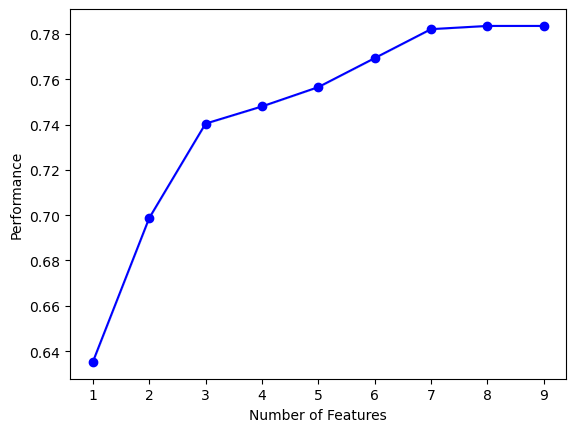

In [11]:
plot_sfs(sfs.get_metric_dict())
plt.show()

## Sequential Backward Selection

In [12]:
sbs = SFS(estimator=lr, forward=False, floating=False, k_features=7, scoring='accuracy', cv=0)

### Fit the model

In [13]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

### Inspect the results

In [14]:
print(sbs.subsets_[7])

{'feature_idx': (1, 2, 3, 6, 9, 10, 16), 'cv_scores': array([0.76740881]), 'avg_score': 0.7674088109900521, 'feature_names': ('Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Public_Transportation')}


### Chosen features and model accuracy

In [15]:
print(sbs.subsets_[7]['feature_names'])
print(sbs.subsets_[7]['avg_score'])

('Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Public_Transportation')
0.7674088109900521


### Visualize model accuracy

/Users/xuan/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/xuan/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


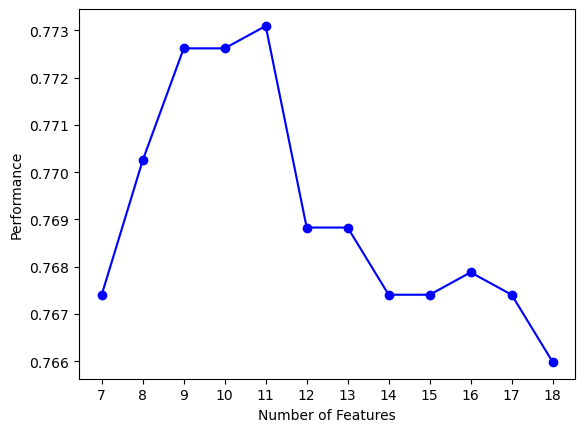

In [16]:
plot_sfs(sbs.get_metric_dict())
plt.show()

## Recursive Feature Elimination

In [17]:
features = X.columns

### Standardize the data

In [18]:
X = pd.DataFrame(StandardScaler().fit_transform(X))

### Recursive feature elimination model

In [19]:
rfe = RFE(estimator=lr, n_features_to_select=8)

### Fit the model

In [20]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

### Inspect chosen features

In [21]:
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print(rfe_features)

['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']


### Model accuracy

In [22]:
print(rfe.score(X, y))

0.7678825201326386
